# Question 1

### For the prostate data of Chapter 3 (ESL), carry out a best-subset linear regression analysis, as in Table 3.3 (third column from the left). Compute the AIC, BIC, five- and tenfold cross-validation, and bootstrap .632 estimates of prediction error. The data can be obtained from the book website.

In [357]:
install.packages("ISLR")
install.packages("knitr")
install.packages("printr")
install.packages('leaps')
install.packages('bootstrap')
install.packages('lattice')
install.packages('caret')
library(lattice)
library(caret)
library(bootstrap)
library(leaps)
library(ISLR)
library(knitr)
library(printr)
library(boot)


The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages


also installing the dependency ‘xfun’





The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages


Warning message in FUN(X[[i]], ...):
“unknown type in R_decompress3”


ERROR: Error in FUN(X[[i]], ...): lazy-load database '/Library/Frameworks/R.framework/Versions/4.2/Resources/library/lattice/data/Rdata.rdb' is corrupt


load the data

In [21]:
install.packages("ElemStatLearn_2015.6.26.tar.gz", repos = NULL, type = "source")
library("ElemStatLearn")
data(prostate)

Warning message in install.packages("ElemStatLearn_2015.6.26.tar.gz", repos = NULL, :
“installation of package ‘ElemStatLearn_2015.6.26.tar.gz’ had non-zero exit status”


In [22]:
str( prostate )

'data.frame':	97 obs. of  10 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...
 $ train  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


Computing best subsets regression


In [29]:
train_set<-subset(prostate,train=="TRUE")[,1:9]
test_set<-subset(prostate,train=="FALSE")[,1:9]
y_train<-train_set$lpsa
y_test<-test_set$lpsa

regfit.full<-regsubsets(lpsa~.,data=train_set, nbest=1,nvmax=8,method="exhaustive")
my_sum <- summary(regfit.full)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(lpsa ~ ., data = train_set, nbest = 1, nvmax = 8, 
    method = "exhaustive")
8 Variables  (and intercept)
        Forced in Forced out
lcavol      FALSE      FALSE
lweight     FALSE      FALSE
age         FALSE      FALSE
lbph        FALSE      FALSE
svi         FALSE      FALSE
lcp         FALSE      FALSE
gleason     FALSE      FALSE
pgg45       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         lcavol lweight age lbph svi lcp gleason pgg45
1  ( 1 ) "*"    " "     " " " "  " " " " " "     " "  
2  ( 1 ) "*"    "*"     " " " "  " " " " " "     " "  
3  ( 1 ) "*"    "*"     " " " "  "*" " " " "     " "  
4  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     " "  
5  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     "*"  
6  ( 1 ) "*"    "*"     " " "*"  "*" "*" " "     "*"  
7  ( 1 ) "*"    "*"     "*" "*"  "*" "*" " "     "*"  
8  ( 1 ) "*"    "*"     "*" "*"  "*" "*" "*"     "*"  

## Model selection criteria: AIC & BIC

[1] "Subset selected by AIC = 7"
[1] "AIC values"


[1] 168.7642 158.5210 156.4548 154.3127 154.7729 153.4984 153.0350 155.0101

[1] "Subset selected by BIC = 2"
[1] "BIC values"


[1] 175.3782 167.3397 167.4783 167.5408 170.2058 171.1359 172.8772 177.0570

[1] "Test error of 2 variable model: 0.492482349035638"


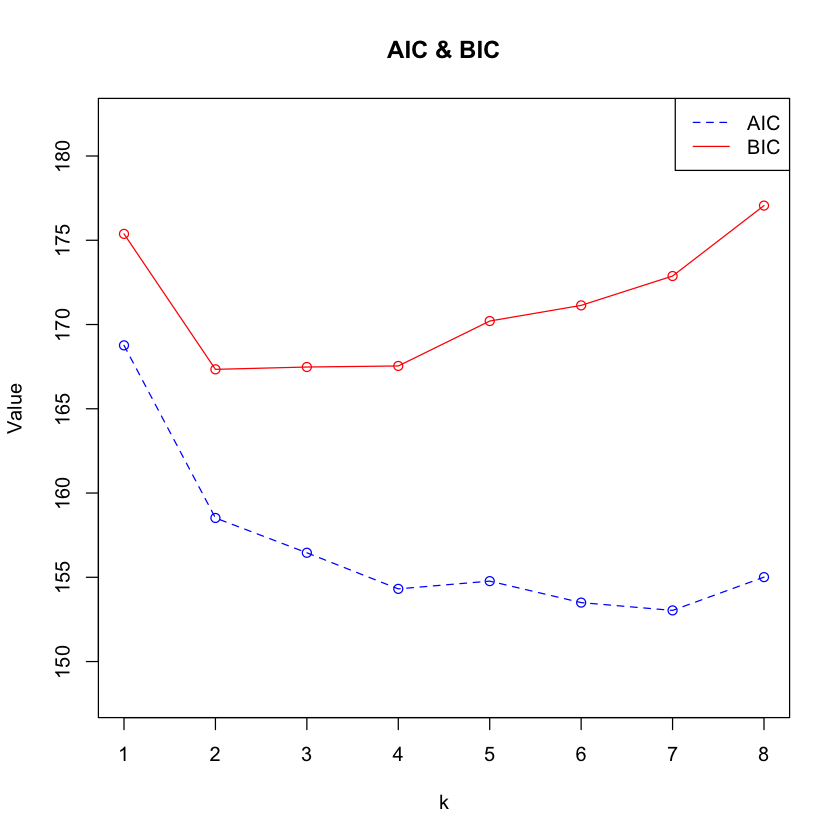

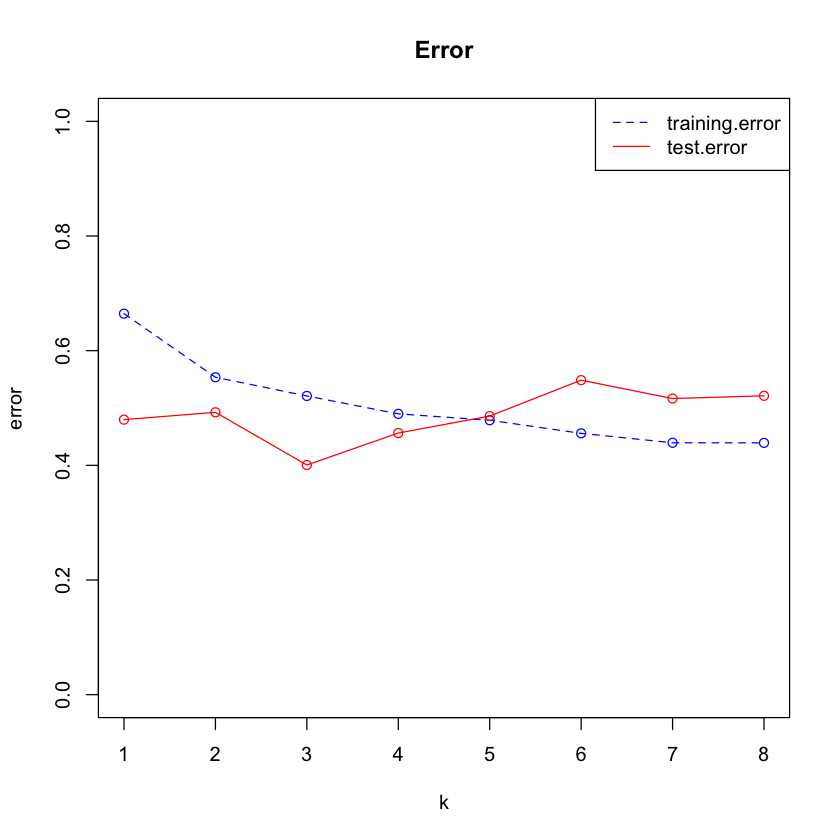

In [53]:
select = my_sum$outmat
train_error_store<-c()
test_error_store<-c()
AIC_store<-c()
BIC_store<-c()

for(i in 1:8){
  temp<-which(select[i,]=="*")
  red_train<-train_set[,c(9,temp)]
  red_test<-test_set[,c(9,temp)]
  red_fit<-lm(lpsa~.,data=red_train)
  AIC<-AIC(red_fit)
  BIC<-BIC(red_fit)
  predict_train<-predict(red_fit,newdata=red_train)
  predict_test<-predict(red_fit,newdata=red_test)
  train_error<-sum((predict_train-y_train)^2)/length(y_train)
  test_error<-sum((predict_test-y_test)^2)/length(y_test)
  train_error_store<-c(train_error_store,train_error)
  test_error_store<-c(test_error_store,test_error)
  AIC_store<-c(AIC_store,AIC)
  BIC_store<-c(BIC_store,BIC)
  
  
}

# print('Train error')
# train_error_store
# min(train_error_store)
# print('Test error')
# test_error_store
# min(test_error_store)


print(paste("Subset selected by AIC =",which.min(AIC_store)))
print('AIC values')
AIC_store

print(paste("Subset selected by BIC =",which.min(BIC_store)))
print('BIC values')
BIC_store

print(paste('Test error of 2 variable model:',test_error_store[2]))


upper= max(AIC_store,BIC_store)
lower= min(AIC_store,BIC_store)


plot(AIC_store,type="o",lty=2,col = "blue",ylim = c(lower-5,upper+5),xlab = "k",main="AIC & BIC",ylab="Value")
lines(BIC_store,type="o",lty=1,col="red")
legend("topright",c("AIC", "BIC"),lty=c(2,1),col=c("blue","red"))


plot(train_error_store,type="o",lty=2,col = "blue",ylim = c(0,1),xlab = "k",ylab="error",main="Error")
lines(test_error_store,type="o",lty=1,col="red")
legend("topright",c("training.error", "test.error"),lty=c(2,1),col=c("blue","red"))



The model with the lowest AIC is the best among several. We discover a broader model with seven factors for the AIC (lcavol, lweight, age, lbph, svi, lcp ,pgg45). Only the predictor Gleason was eliminated during this selection process. Since the BIC penalizes the number of parameters more severely, it chooses smaller models. In this instance, we discover that the ideal model includes lweight and lcavol.

We can observe that this model's test error is 0.49.

## Model selection criteria: k-cross validation

### k=5

In [128]:
predict.regsubsets = function(object,newdata,id,...){
      form = as.formula(object$call[[2]]) # Extract the formula used when we called regsubsets()
      mat = model.matrix(form,newdata)    # Build the model matrix
      coefi = coef(object,id=id)          # Extract the coefficiants of the ith model
      xvars = names(coefi)                # Pull out the names of the predictors used in the ith model
      mat[,xvars]%*%coefi               # Make predictions using matrix multiplication
}

In [129]:
k = 5        # number of folds
set.seed(1)   # set the random seed so we all get the same results

# Assign each observation to a single fold
folds = sample(1:k, nrow(prostate), replace = TRUE)

# Create a matrix to store the results of our upcoming calculations
cv_errors = matrix(NA, k, 8, dimnames = list(NULL, paste(1:8)))

In [130]:
# Outer loop iterates over all folds
for(j in 1:k){
    
    # The perform best subset selection on the full dataset, minus the jth fold
    best_fit = regsubsets(lpsa~., data = prostate[folds!=j,], nvmax=8)
    
    # Inner loop iterates over each size i
    for(i in 1:8){
        
        # Predict the values of the current fold from the "best subset" model on i predictors
        pred = predict(best_fit, prostate[folds==j,], id=i)
        
        # Calculate the MSE, store it in the matrix we created above
        cv_errors[j,i] = mean((prostate$lpsa[folds==j]-pred)^2)
    }
}

[1] "MSE for k=5:  0.51668234608548"


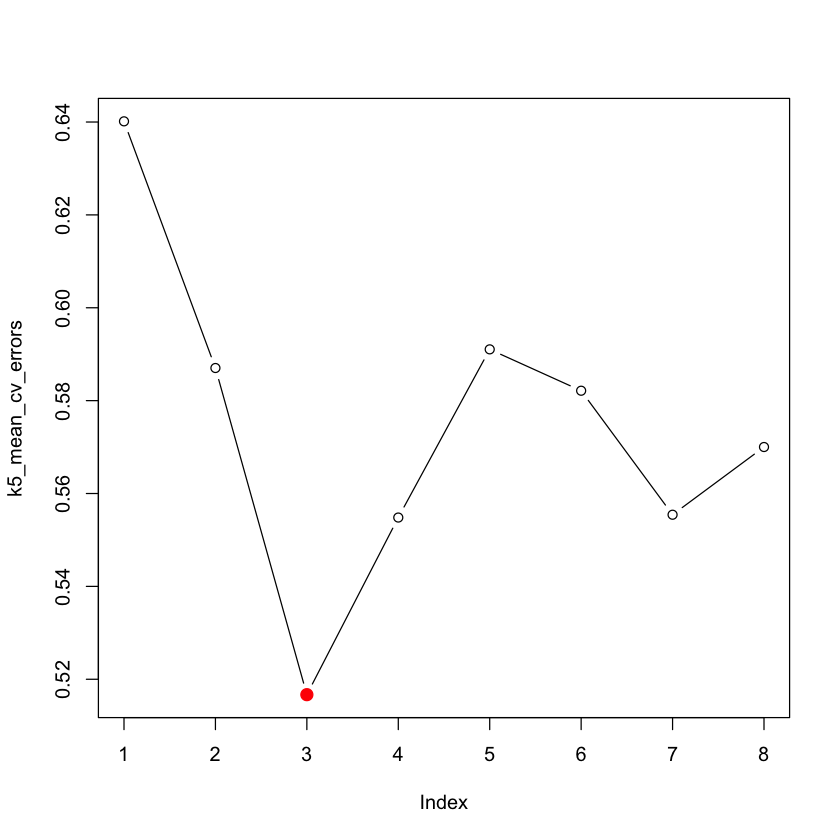

In [149]:
# Take the mean of over all folds for each model size
k5_mean_cv_errors = apply(cv_errors, 2, mean)

# Find the model size with the smallest cross-validation error
min = which.min(k5_mean_cv_errors)

# Plot the cross-validation error for each model size, highlight the min
plot(k5_mean_cv_errors, type='b')
points(min, k5_mean_cv_errors[min][1], col = "red", cex = 2, pch = 20)

print(paste("MSE for k=5: ",min(mean_cv_errors)))

In [150]:
reg_best = regsubsets(lpsa~., data = prostate, nvmax = 8)
coef(reg_best, 3)

(Intercept)      lcavol     lweight         svi 
 -0.7771566   0.5258519   0.6617699   0.6656666

### k=10

In [151]:
k = 10        # number of folds
set.seed(567)   # set the random seed so we all get the same results

# Assign each observation to a single fold
folds = sample(1:k, nrow(prostate), replace = TRUE)

# Create a matrix to store the results of our upcoming calculations
cv_errors = matrix(NA, k, 8, dimnames = list(NULL, paste(1:8)))

In [152]:
# Outer loop iterates over all folds
for(j in 1:k){
    
    # The perform best subset selection on the full dataset, minus the jth fold
    best_fit = regsubsets(lpsa~., data = prostate[folds!=j,], nvmax=8)
    
    # Inner loop iterates over each size i
    for(i in 1:8){
        
        # Predict the values of the current fold from the "best subset" model on i predictors
        pred = predict(best_fit, prostate[folds==j,], id=i)
        
        # Calculate the MSE, store it in the matrix we created above
        cv_errors[j,i] = mean((prostate$lpsa[folds==j]-pred)^2)
    }
}

[1] "MSE for k=10:  0.51668234608548"


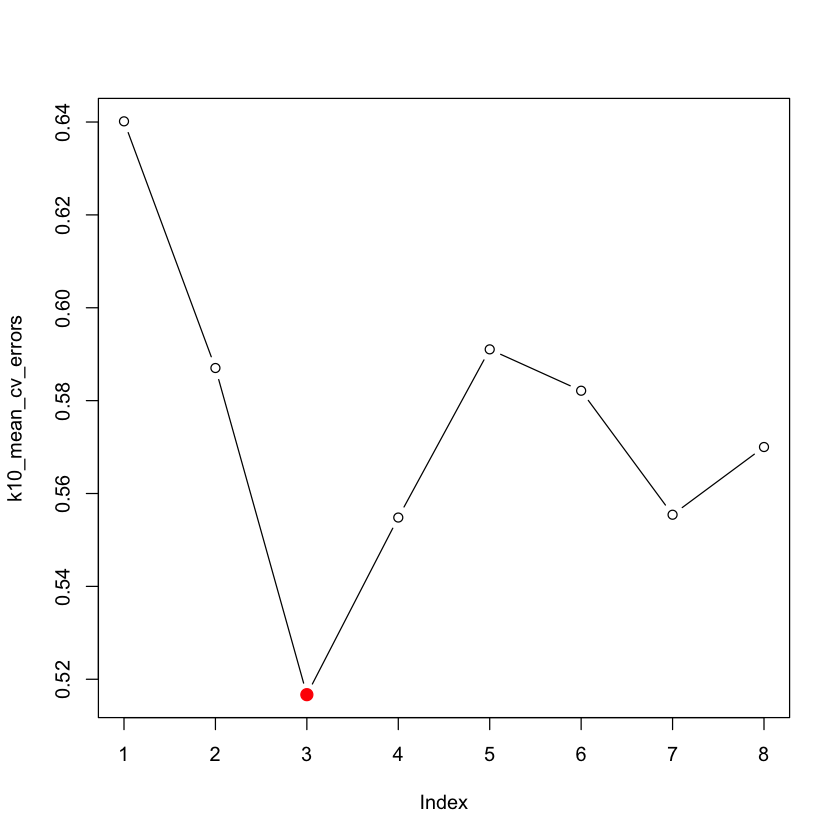

In [153]:
# Take the mean of over all folds for each model size
k10_mean_cv_errors = apply(cv_errors, 2, mean)

# Find the model size with the smallest cross-validation error
min = which.min(k10_mean_cv_errors)

# Plot the cross-validation error for each model size, highlight the min
plot(k10_mean_cv_errors, type='b')
points(min, k10_mean_cv_errors[min][1], col = "red", cex = 2, pch = 20)


print(paste("MSE for k=10: ",min(mean_cv_errors)))

In [154]:
reg_best = regsubsets(lpsa~., data = prostate, nvmax = 8)
coef(reg_best, 3)

(Intercept)      lcavol     lweight         svi 
 -0.7771566   0.5258519   0.6617699   0.6656666

Above, we implemented best-subset cross-validation for linear regression. We call that procedure and then receive the set of predictors from the k=5, k=10 that have the smallest cross-validated estimate of the mean square error. Similar subset with three variables is obtained using 5-fold and 10-fold cross-validation (lcavol,lweight,svi).

## Model selection criteria: bootstrap.632

[1] 0.6326301 0.5714640 0.5308230 0.5397185 0.5327306 0.5447434 0.5262145
[8] 0.5407967

[1] "Bootstrp.632 error for  7 variabl model is 0.526214505661281"


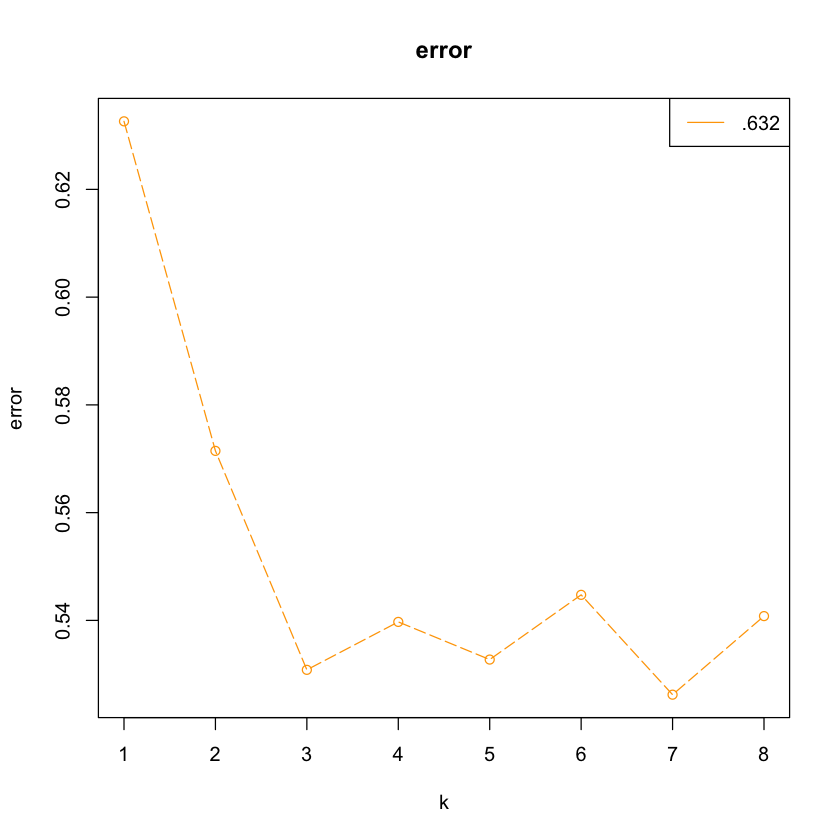

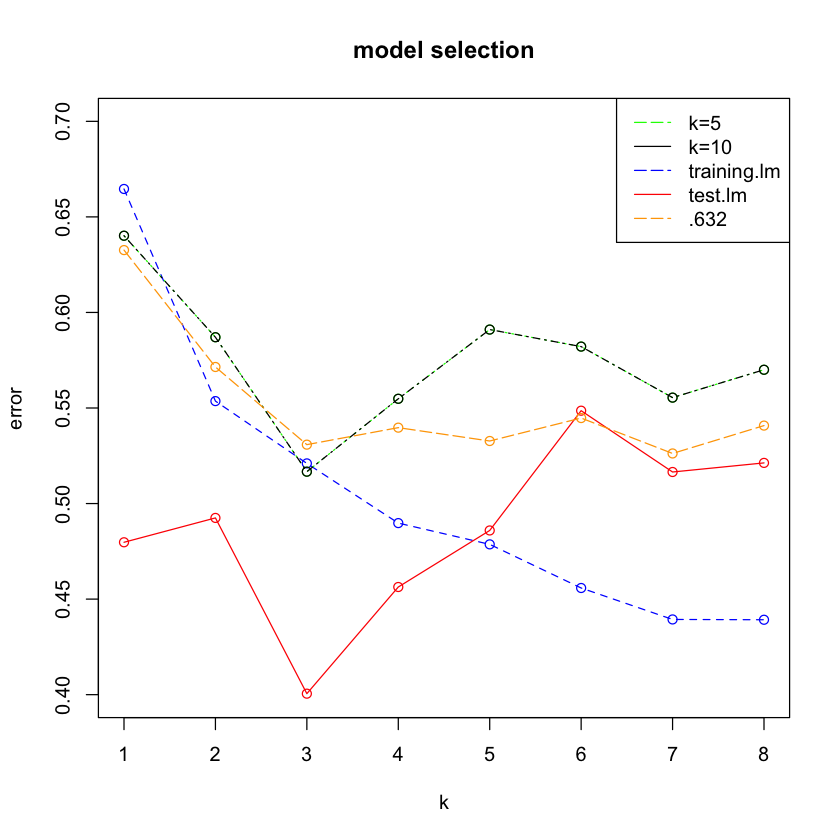

In [156]:
set.seed(1)

x<-prostate[,1:8]
y<-prostate[,9]

theta_fit<-function(x,y){lsfit(x,y)}
theta_predict<-function(fit,x){cbind(1,x)%*%fit$coef}
sq_err<-function(y,yhat){(y-yhat)^2}

bootstrap_632_error_store<-c()
for(i in 1:8){
  temp<-which(select[i,]=="*")
  res<-bootpred(x[,temp],y,nboot = 50,theta_fit,theta_predict,err.meas=sq_err)
  bootstrap_632_error_store<-c(bootstrap_632_error_store,res[[3]])
}

bootstrap_632_error_store
print(paste("Bootstrp.632 error for ",which.min(bootstrap_632_error_store),"variabl model is",min(bootstrap_632_error_store)))

plot(bootstrap_632_error_store,type="o",lty=5,col="orange",main="error",xlab = "k",ylab="error")
legend("topright",c(".632"),lty=1,col=c("orange"))

plot(train_error_store,type="o",lty=2,col = "blue",ylim = c(0.4,0.7),xlab = "k",ylab="error",main="model selection")
lines(test_error_store,type="o",lty=1,col="red")
lines(k5_mean_cv_errors,type="o",lty=3,col = "green")
lines(k10_mean_cv_errors,type="o",lty=4,col="black")
lines(bootstrap.632.error.store,type="o",lty=5,col="orange")
legend("topright",c("k=5", "k=10","training.lm", "test.lm",".632"),lty=c(5,1),col=c("green","black","blue","red","orange"))

The model with two variables is the best fit for this data set, according to the subset selection approach, which was based on BIC. The model with three variables appears to have the best accuracy, according to the MSE obtained by running Cross Validation (both k5 and k10) on the same data set. In contrast, the bootstrap.632 resampling approach estimates an error of 0.52 for a model with 7 variables that is similar to the AIC.

The 0.632 estimator uses bootstrap samples to calculate the prediction error. It gives equal weight to a bootstrapped estimate and the training error. The best subset size determined by different methods is 3, and the stated error lies between 0.50 and 0.51.The testing MSE of 0.49 appears to be a bit optimistic based on these figures.

# Question 2

### The Bikeshare data (ISLR2) contains the hourly and daily count of rental bikes between 2011-2012 in a bikeshare program. Other important features such as weather, and seasonal information, are also included. You are asked to construct a regression tree to predict the daily count of rental bikes.

### *(a) Divide the data into test and training and perform model selection to determine the optimal tree size. Comment on the performance of the tree. How many test samples are assigned to each terminal region?*


In [24]:
install.packages("rpart")
install.packages('MASS')
install.packages('ISLR2')
install.packages('rpart.plot')
library(rpart.plot)
library(ISLR2)
library(rpart)
library(MASS)


The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
ISLR2  1.3-1  1.3-2             FALSE



installing the source package ‘ISLR2’





The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages


In [229]:
set.seed(2255)

bikeshare_df<-read.csv("/Users/sreeragvenugopalan/Desktop/Sem 1/Statistical Data Mining/HW/4/Bike-Sharing-Dataset/day.csv")
head(bikeshare_df,5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### PreProcess Data

We can see that column 'cnt' is the sum of 'casual' and 'registered', So we will remove those two columns.

In [230]:
bikeshare_df<-subset(bikeshare_df,select=-c(casual,registered))
head(bikeshare_df,5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Renaming the column titles.

In [231]:
names(bikeshare_df)<-c('ID','datetime','season','year','month','holiday','weekday','workingday','weather_condition','temp','atemp','humidity','windspeed','total_count')
head(bikeshare_df,5)

,ID,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Typcast some columns

In [232]:
bikeshare_df$datetime<- as.Date(bikeshare_df$datetime)
bikeshare_df$year<-as.factor(bikeshare_df$year)
bikeshare_df$month<-as.factor(bikeshare_df$month)
bikeshare_df$season <- as.factor(bikeshare_df$season)
bikeshare_df$holiday<- as.factor(bikeshare_df$holiday)
bikeshare_df$weekday<- as.factor(bikeshare_df$weekday)
bikeshare_df$workingday<- as.factor(bikeshare_df$workingday)
bikeshare_df$weather_condition<- as.factor(bikeshare_df$weather_condition)
head(bikeshare_df,5)

,ID,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


check for NA values

In [233]:
any(is.na(bikeshare_df))


[1] FALSE

Split the dataset into train and test


In [234]:
train_index<-sample(1:nrow(bikeshare_df),0.7*nrow(bikeshare_df))
train_data<-bikeshare_df[train_index,]
test_data<-bikeshare_df[-train_index,]
head(train_data,5)
head(test_data,5)

,ID,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
29,29,2011-01-29,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365,1098
557,557,2012-07-10,3,1,7,0,2,1,2,0.720833,0.664796,0.667500,0.151737,6290
689,689,2012-11-19,4,1,11,0,1,1,2,0.380833,0.375621,0.623333,0.235067,5499
117,117,2011-04-27,2,0,4,0,3,1,2,0.620000,0.575142,0.835417,0.312200,3872
541,541,2012-06-24,3,1,6,0,0,0,1,0.743333,0.674254,0.479167,0.145525,6891


,ID,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
,<int>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,2,2011-01-02,1,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.248539,801
7,7,2011-01-07,1,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.168726,1510
13,13,2011-01-13,1,0,1,0,4,1,1,0.1650000,0.1508830,0.470417,0.301000,1406
20,20,2011-01-20,1,0,1,0,4,1,2,0.2616670,0.2550500,0.538333,0.195904,1927
23,23,2011-01-23,1,0,1,0,0,0,1,0.0965217,0.0988391,0.436522,0.246600,986


In [235]:
train<-subset(train_data,select=c('season','year','month','holiday', 'weekday','workingday','weather_condition','temp','humidity','windspeed','total_count'))
test<-subset(test_data,select=c('season','year','month','holiday','weekday','workingday','weather_condition','temp','humidity','windspeed','total_count'))


One-hot encoding the categorical values usigng dummyVars

In [236]:
dumy_cat_vals <- dummyVars('~ season+holiday+workingday+weather_condition+year', data = train)
dumy_cat_vals_df <- data.frame(predict(dumy_cat_vals, newdata = train))

create a new subset for train and test; categorical, numerical attributes


In [237]:
train_cat_attributes<-subset(train,select=c('season','holiday','workingday','weather_condition','year'))
test_cat_attributes<-subset(test,select=c('season','holiday','workingday','weather_condition','year'))
train_num_attributes<-subset(train,select=c('weekday','month','temp','humidity','windspeed','total_count'))
test_num_attributes<-subset(test,select=c('weekday','month','temp', 'humidity','windspeed','total_count'))

In [238]:
train_encoded_attributess<-cbind(train_num_attributes,dumy_cat_vals_df)
head(train_encoded_attributess,5)

,weekday,month,temp,humidity,windspeed,total_count,season.1,season.2,season.3,season.4,holiday.0,holiday.1,workingday.0,workingday.1,weather_condition.1,weather_condition.2,weather_condition.3,year.0,year.1
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,6,1,0.196522,0.651739,0.145365,1098,1,0,0,0,1,0,1,0,1,0,0,1,0
557,2,7,0.720833,0.667500,0.151737,6290,0,0,1,0,1,0,0,1,0,1,0,0,1
689,1,11,0.380833,0.623333,0.235067,5499,0,0,0,1,1,0,0,1,0,1,0,0,1
117,3,4,0.620000,0.835417,0.312200,3872,0,1,0,0,1,0,0,1,0,1,0,1,0
541,0,6,0.743333,0.479167,0.145525,6891,0,0,1,0,1,0,1,0,1,0,0,0,1


Building and traing the model

In [239]:
rpart.control<-rpart.control(minbucket = 2,minsplit = 4, xval = 10, cp = 0.01) 
original_fit_bshare<-rpart(train_encoded_attributess$total_count~.,data=train_encoded_attributess[,-c(6)],control=rpart.control,method='anova',cp=0.01)
original_fit_bshare

n= 511 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 511 1882115000.0 4492.544  
   2) temp< 0.432373 204  449964900.0 3032.240  
     4) year.1< 0.5 109  114334800.0 2268.734  
       8) season.4< 0.5 75   29791150.0 1739.467 *
       9) season.4>=0.5 34   17190340.0 3436.235 *
     5) year.1>=0.5 95  199185000.0 3908.263  
      10) temp< 0.2804165 29   14609140.0 2488.448 *
      11) temp>=0.2804165 66  100428300.0 4532.121  
        22) season.1>=0.5 27   20318370.0 3713.000 *
        23) season.1< 0.5 39   49452270.0 5099.205 *
   3) temp>=0.432373 307  708048800.0 5462.909  
     6) year.0>=0.5 148  109593600.0 4257.520  
      12) weather_condition.3>=0.5 7     858316.9 2264.857 *
      13) weather_condition.3< 0.5 141   79560490.0 4356.447 *
     7) year.0< 0.5 159  183255500.0 6584.906  
      14) humidity>=0.8322915 8    2719668.0 4539.750 *
      15) humidity< 0.8322915 151  145301700.0 6693.258  
        30) month=2,3,4,5,7,11,12 76   65508410.0 

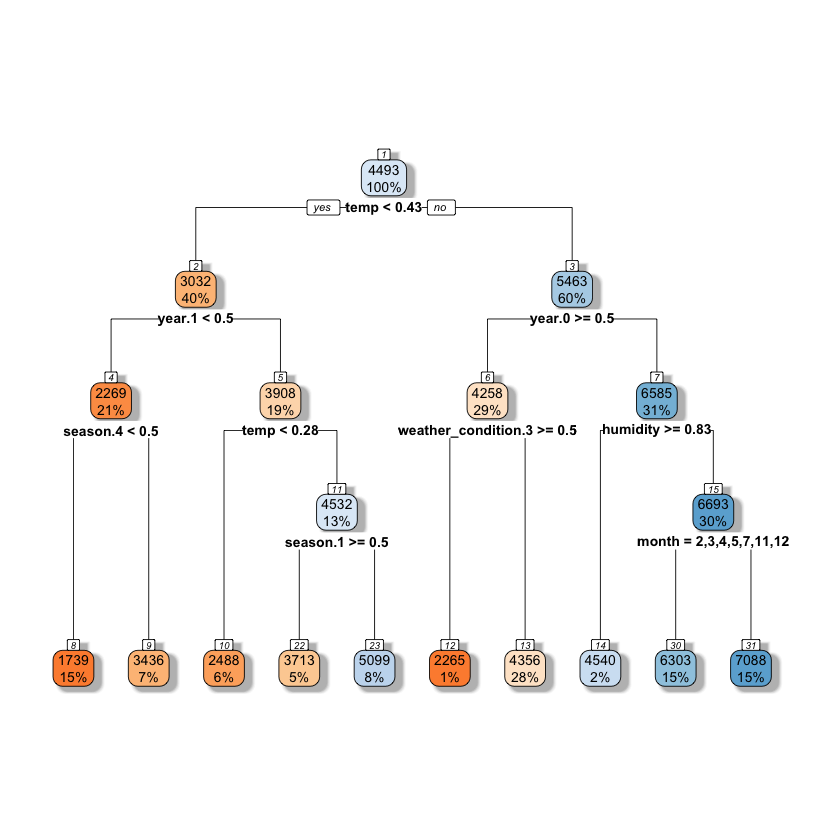

In [240]:
rpart.plot(original_fit_bshare, box.palette="OrBu", shadow.col="gray", nn=TRUE,roundint=FALSE)

In [275]:
min_cp = which.min(original_fit_bshare$cptable[,4])
pruned_fit_bshare <- prune(original_fit_bshare, cp = original_fit_bshare$cptable[min_cp, 1])
pruned_fit_bshare

n= 511 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 511 1882115000.0 4492.544  
   2) temp< 0.432373 204  449964900.0 3032.240  
     4) year.1< 0.5 109  114334800.0 2268.734  
       8) season.4< 0.5 75   29791150.0 1739.467 *
       9) season.4>=0.5 34   17190340.0 3436.235 *
     5) year.1>=0.5 95  199185000.0 3908.263  
      10) temp< 0.2804165 29   14609140.0 2488.448 *
      11) temp>=0.2804165 66  100428300.0 4532.121  
        22) season.1>=0.5 27   20318370.0 3713.000 *
        23) season.1< 0.5 39   49452270.0 5099.205 *
   3) temp>=0.432373 307  708048800.0 5462.909  
     6) year.0>=0.5 148  109593600.0 4257.520  
      12) weather_condition.3>=0.5 7     858316.9 2264.857 *
      13) weather_condition.3< 0.5 141   79560490.0 4356.447 *
     7) year.0< 0.5 159  183255500.0 6584.906  
      14) humidity>=0.8322915 8    2719668.0 4539.750 *
      15) humidity< 0.8322915 151  145301700.0 6693.258  
        30) month=2,3,4,5,7,11,12 76   65508410.0 

[1] "Optimal tree size is: 10"


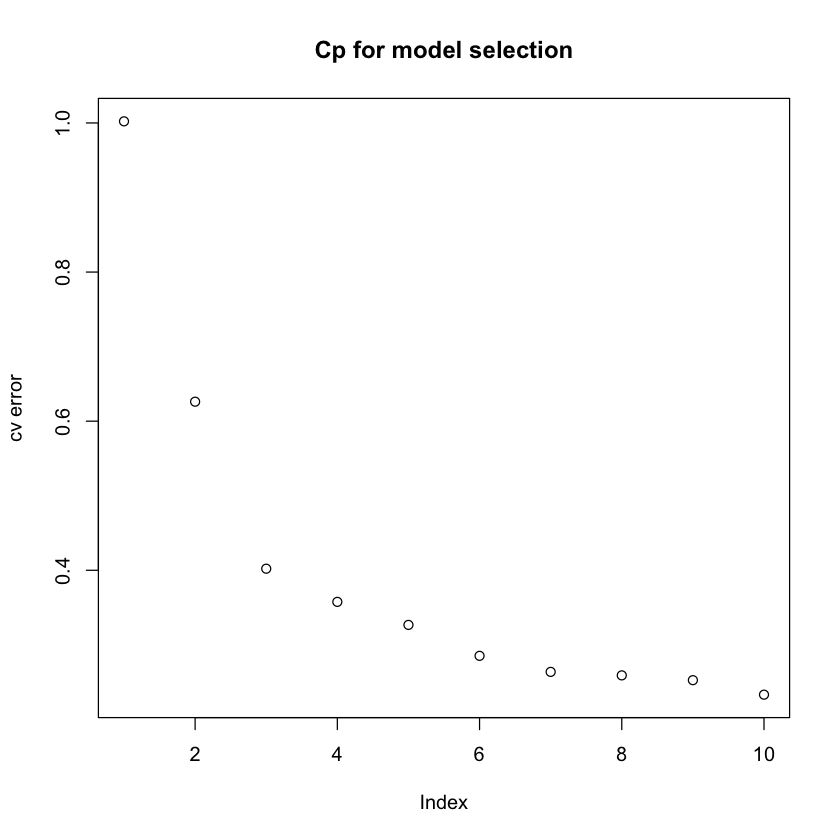

In [276]:
plot(original_fit_bshare$cptable[,4], main = "Cp for model selection", ylab = "cv error")

print(paste('Optimal tree size is:',min_cp))

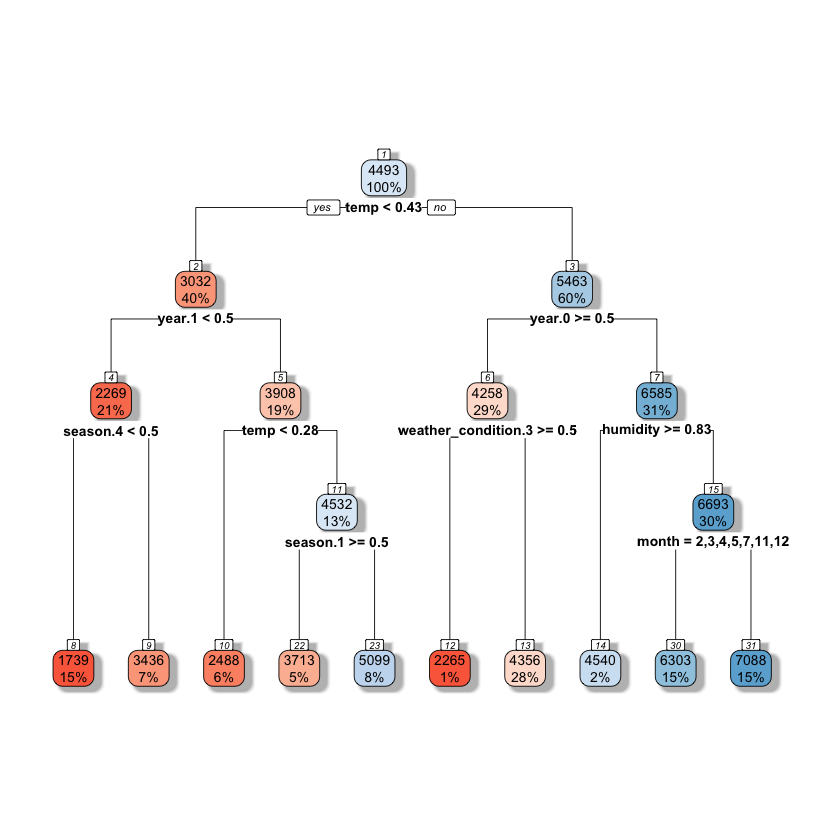

In [277]:
rpart.plot(pruned_fit_bshare, box.palette="RdBu", shadow.col="gray", nn=TRUE,roundint=FALSE)

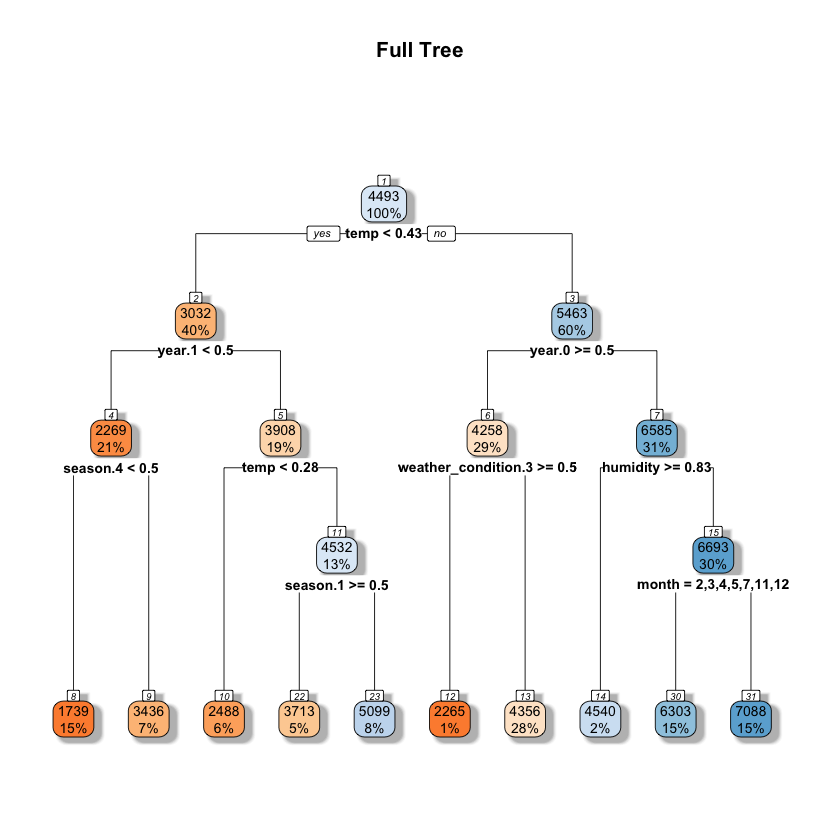

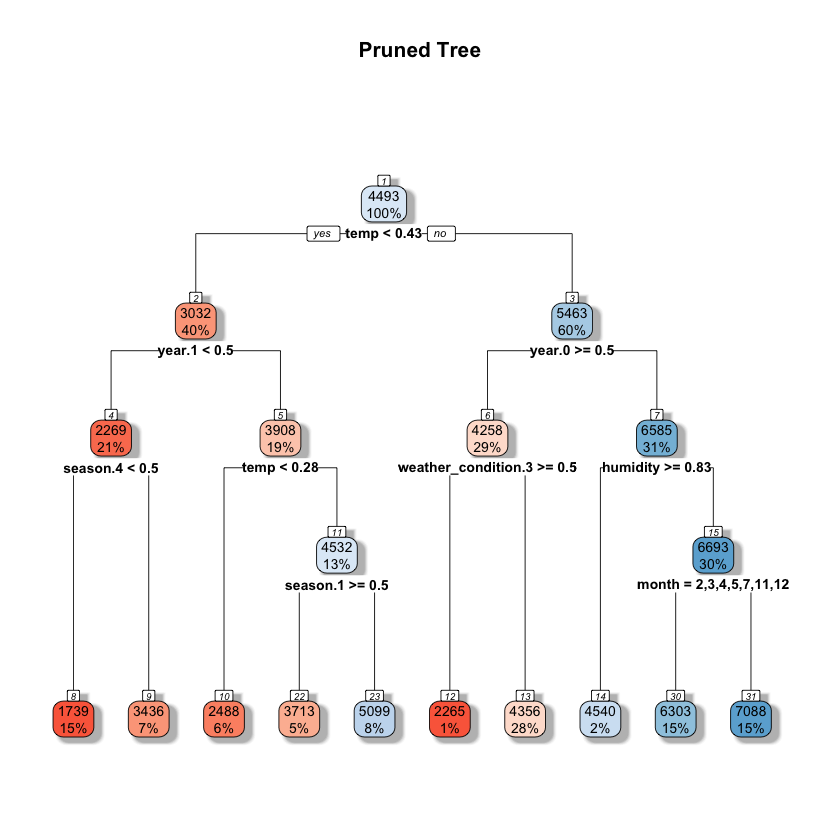

In [244]:
rpart.plot(original_fit_bshare, box.palette="OrBu", shadow.col="gray", nn=TRUE,roundint=FALSE, main='Full Tree')


rpart.plot(pruned_fit_bshare, box.palette="RdBu", shadow.col="gray", nn=TRUE,roundint=FALSE,main='Pruned Tree')

As you can see, pruning had no impact on the original tree. I believe this is because the tree was already in extremely good condition to begin with. Pruning is the process of removing leaves that do not considerably improve accuracy, i.e., to avoid overfitting. Since we deleted a few columns that seemed insignificant during the feature selection and preprocessing, the data is optimally balanced.

We can see that almost all termincal node have less than 10% of distribution of test samples. Only one node with decision 'no' has the distribtion of 28%.

### *(b) The board wants to identify good times to do “repair” and “tune-ups”. However, they want to minimize disruption of usage. You are asked to describe the “low yield” settings when the bikes are not being utilized (counts are low). Use your tree to advise on this matter.*


From the above pruned tree it is clear that the bikers count are low at the left most node of the tree. A warm summer day with minimal humidity would be ideal for the highest bike rental rates. We can infer that the quantity of bicycle rentals every day depends on a variety of parameters, including seasonal and weather-related ones. On the other hand, the fall (seaosn 4) season, which runs from September through December, has the lowest bike rental rates, indicating that the two most significant factors influencing demand for bike sharing rentals are the season and the temperature. So the low yeilds can be maximized durinf these seasons.

# Question 3

### The Wage data (ISLR2) contains information related to demographics and earnings of males in the Mid-Atlantic area. Discretize “Wage” into three categories (low, med, high). You are asked to construct a classification tree to predict “Wage”.

### *a) Divide the data into test and training and perform model selection to determine the optimal tree size. Comment on the performance of the tree. How many test samples are assigned to each terminal region?*

loadding libraries

In [180]:
install.packages('ISLR')
install.packages('ggplot2')
install.packages('caret')
install.packages('tidyverse')
library(tidyverse)
library(ISLR)
library(ggplot2)
library(caret)


The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages

The downloaded binary packages are in
	/var/folders/ch/lqq67w6x5px6fcc9cnbp457m0000gn/T//Rtmp2yueMP/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::select() masks MASS::select()


In [888]:
data(Wage)
head(Wage,5)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315


Now that we have seen that the variable "region" only has the value "Middle Atlantic," we will remove it as it is unable to distinguish between any observations. Additionally, the predictor "logwage" will be removed because it has no significance with the dependent variable. We shall also eliminate that variable as we will discretize the "wage." We can combine "3. Widowed", "4. Divorced", and "5. Separated" into a more populous level known as "3. Other" to increase the robustness of the models to be built because they all have somewhat similar meanings.

In [889]:
Wage = Wage %>% 
  mutate(wage_category = case_when(wage < quantile(wage, 0.25) ~ "Low",
                                  wage >= quantile(wage, 0.25) & wage <= quantile(wage, 0.75) ~ "Medium",
                                  wage > quantile(wage, 0.75) ~ "High"))
head(Wage,5)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,wage_category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315,Low
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602,Low
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218,High
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529,High
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315,Low


In [890]:
Wage$region <- NULL
Wage$wage <- NULL
Wage$logwage <- NULL
levels(Wage$maritl)[3:5] <- "3. Other"

Checking for missing values

In [891]:
any(is.na(Wage))

[1] FALSE

Split the dataset into train and test


In [892]:
set.seed(2021)
partition <- createDataPartition(y = as.factor(Wage$wage_category),p = .7,list = FALSE)
data.train <- Wage[partition, ] 
data.test <- Wage[-partition, ]
head(data.train,5)

,year,age,maritl,race,education,jobclass,health,health_ins,wage_category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,Low
161300,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,High
11443,2005,50,3. Other,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,Low
376662,2008,54,2. Married,1. White,4. College Grad,2. Information,2. >=Very Good,1. Yes,Medium
450601,2009,44,2. Married,4. Other,3. Some College,1. Industrial,2. >=Very Good,1. Yes,High


In [893]:
data.train$wage_category <- factor(data.train$wage_category)

In [894]:
head(data.train,5)

,year,age,maritl,race,education,jobclass,health,health_ins,wage_category
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,Low
161300,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,High
11443,2005,50,3. Other,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,Low
376662,2008,54,2. Married,1. White,4. College Grad,2. Information,2. >=Very Good,1. Yes,Medium
450601,2009,44,2. Married,4. Other,3. Some College,1. Industrial,2. >=Very Good,1. Yes,High


In [895]:
original_fit_wage =  rpart(wage_category ~. , data = data.train, method = "class", control = rpart.control(minbucket=5, cp=0.0005, maxdepth=7), parms = list(split = "gini"))

original_fit_wage

n= 2102 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 2102 1038 Medium (0.24881066 0.24500476 0.50618459)  
    2) education=4. College Grad,5. Advanced Degree 795  427 High (0.46289308 0.10440252 0.43270440)  
      4) age>=33.5 632  300 High (0.52531646 0.09177215 0.38291139)  
        8) education=5. Advanced Degree 259   88 High (0.66023166 0.06177606 0.27799228)  
         16) health_ins=1. Yes 209   61 High (0.70813397 0.02870813 0.26315789)  
           32) maritl=2. Married,3. Other 185   46 High (0.75135135 0.02702703 0.22162162)  
             64) health=2. >=Very Good 149   30 High (0.79865772 0.02013423 0.18120805) *
             65) health=1. <=Good 36   16 High (0.55555556 0.05555556 0.38888889)  
              130) year>=2006.5 15    4 High (0.73333333 0.06666667 0.20000000) *
              131) year< 2006.5 21   10 Medium (0.42857143 0.04761905 0.52380952) *
           33) maritl=1. Never Married 24   10 Medium (0.37500000 0.04166667 0.

In [896]:
prop.table(table(data.train$wage_category))


     High       Low    Medium 
0.2488107 0.2450048 0.5061846 

,CP,nsplit,rel error,xerror,xstd
1,0.0558766859,0,1.0000000,1.0000000,0.02208288
2,0.0168593449,3,0.8323699,0.8545279,0.02181405
3,0.0115606936,5,0.7986513,0.8265896,0.02170902
4,0.0091522158,6,0.7870906,0.8256262,0.02170508
5,0.0072254335,8,0.7687861,0.8265896,0.02170902
6,0.0048169557,10,0.7543353,0.7976879,0.02158173
7,0.0038535645,11,0.7495183,0.7957611,0.02157256
8,0.0028901734,13,0.7418112,0.8082852,0.02163062
9,0.0024084778,16,0.7331407,0.8111753,0.02164351
10,0.0019267823,20,0.7235067,0.8121387,0.02164776


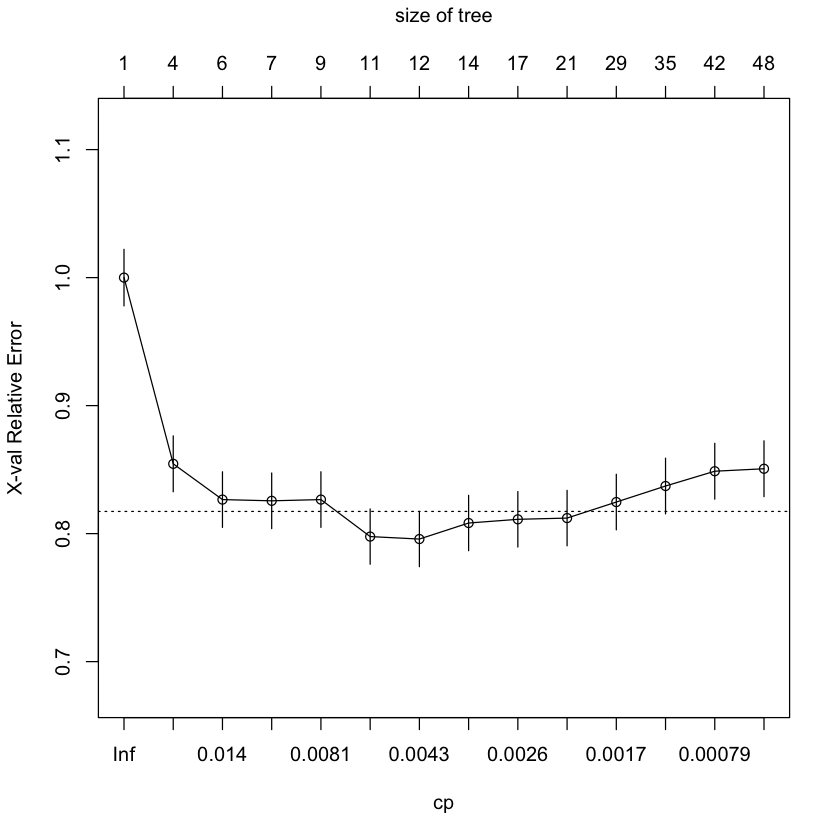

In [897]:
original_fit_wage$cptable
plotcp(original_fit_wage)

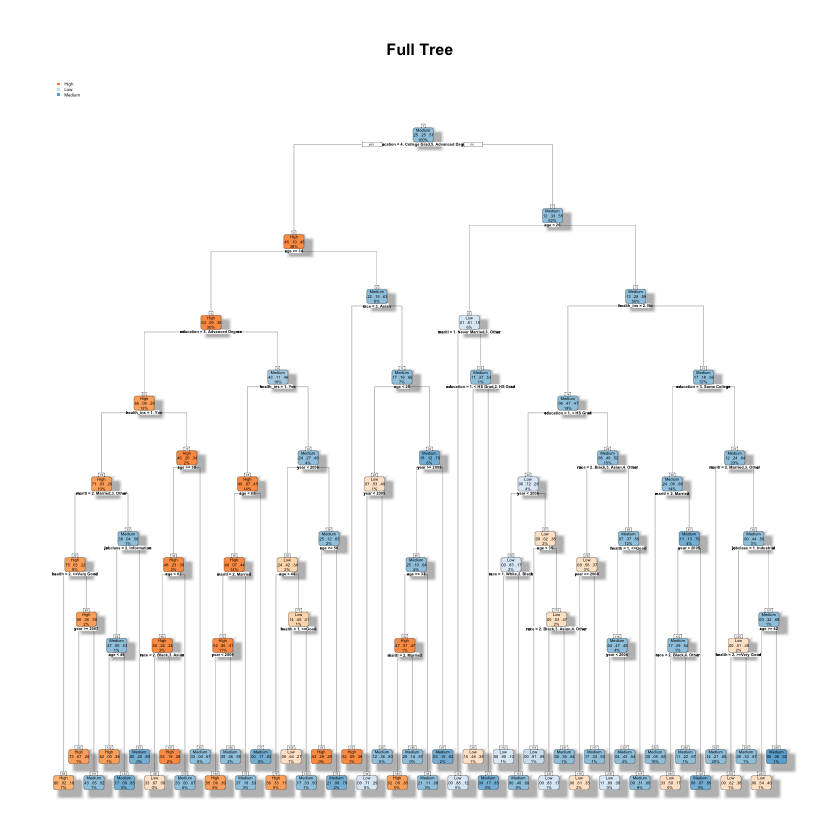

In [898]:
rpart.plot(original_fit_wage, box.palette="OrBu", shadow.col="gray", nn=TRUE,roundint=FALSE, main='Full Tree')

[1] "Optimal tree size is: 7"


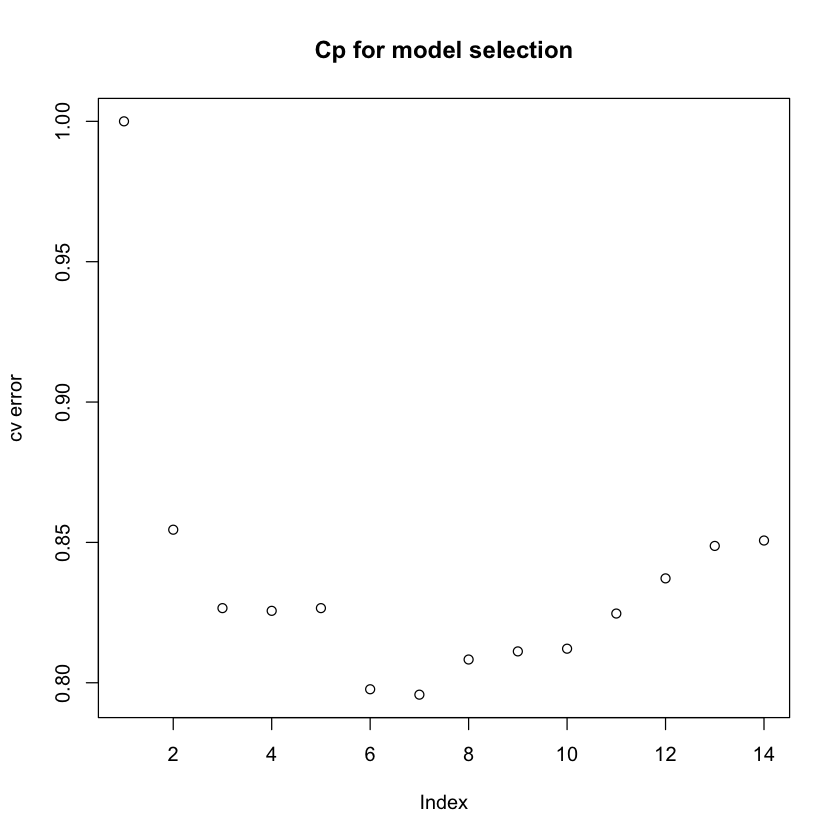

In [899]:
plot(original_fit_wage$cptable[,4], main = "Cp for model selection", ylab = "cv error")

print(paste('Optimal tree size is:',which.min(original_fit_wage$cptable[,4])))

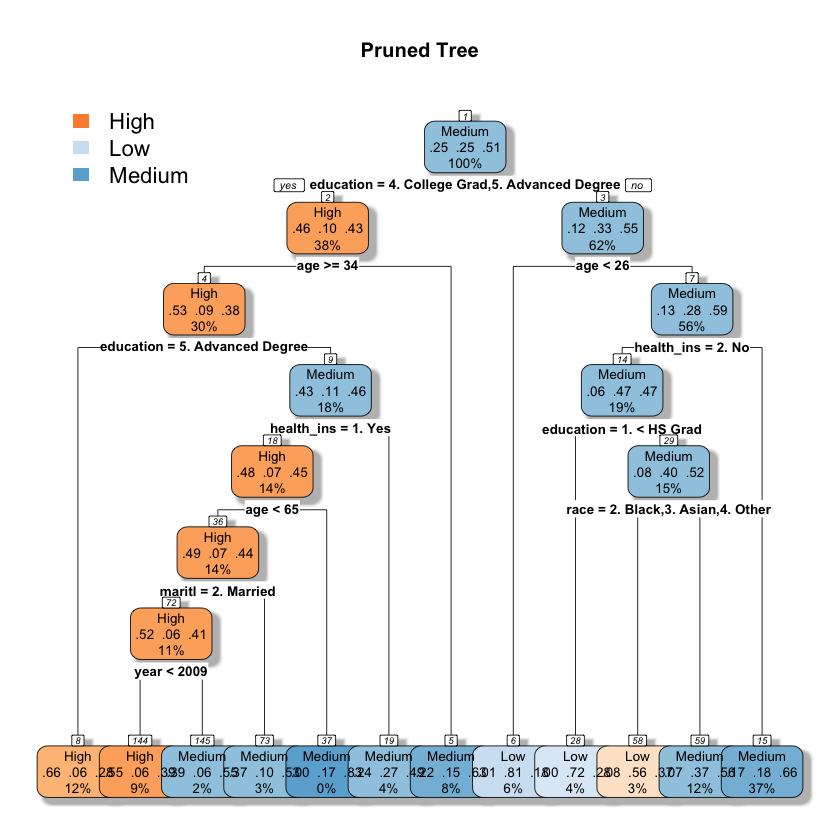

In [902]:
min_cp = original_fit_wage$cptable[which.min(original_fit_wage$cptable[,"xerror"]),"CP"]
pruned_fit_wage <- prune(original_fit_wage,cp = min_cp)
rpart.plot(pruned_fit_wage,tweak=1.5, box.palette="OrBu", shadow.col="gray", nn=TRUE,roundint=FALSE, main='Pruned Tree')

The tree shows that the most important predictor of whether a worker will make a high income is education. The factors that follow schooling in terms of relevance are health indicators, age, and marital status. The pruned tree has 12 terminal nodes and 11 splits. Although it appears simpler than the original tree, the pruned tree is nonetheless complex.

### *b) Model interpretation – you are asked to characterize the high wage earners. What can you say about this group (based on the tree)?*

The pruned tree has 12 terminal nodes and 11 splits. Tree is considerably easier to understand and comprehend than the original tree. The first division is made based on education, which can be thought of as the main predictor. The following divisions include health insurance, marital status, age, year, and education once again. The first division separates areas with high education levels to the left and relatively low education levels to the right. Low/medium earners are the anticipated class for those with low levels of education. High earners are the anticipated class for those with high education levels. The race of Black, Asian, and others is used as the cutoff level for further partitioning of Node 9. Workers of these races are categorized as low earners. Similar to this, Node 8 is further partitioned using a cutoff level of 65 years old. Workers that are younger than this age threshold are categorized as high earners.